In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Sk
from tqdm import tqdm

from WLM import WLChain

In [2]:
q = (np.logspace(0,4,65))

q
L = 1
b = L/100

N_backbone = 10000
a_backbone = N_backbone/100
lambda_backbone = 1/N_backbone

In [3]:
# Pedersen_1996
S_q = Sk.Sk(q,L,b)

In [4]:
# MC
def sample_S_q(n_sample,chain_func,p):
    S_q = np.zeros_like(q)
    for i in tqdm(range(n_sample)):
        chain_func.chain_fix_val_free_rot()
        chain_func.scatter_direct(q,n_merge=1,p_sub=p)
        S_q += chain_func.S_q
        
    return(S_q)

d_exc = [1e-3,1e-1,1e1]
S_q_MC_d = np.zeros([len(q),len(d_exc)])
for i, d in enumerate(d_exc):
    chain = WLChain(N_backbone,a_backbone,lambda_backbone)
    chain.d_exc = chain.a*d
    chain.apply_SA = 1

    n_sample = 100
    S_q_sample = sample_S_q(n_sample,chain,0.02)
    S_q_MC = S_q_sample/n_sample
    S_q_MC_d[:,i] = S_q_MC

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [02:16<00:00,  1.37s/it]


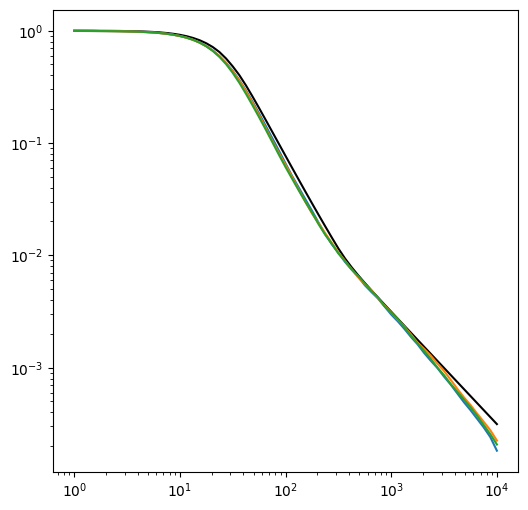

In [5]:
plt.close('all')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(q,S_q,'-k')
ax.plot(q,S_q_MC_d,'-')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

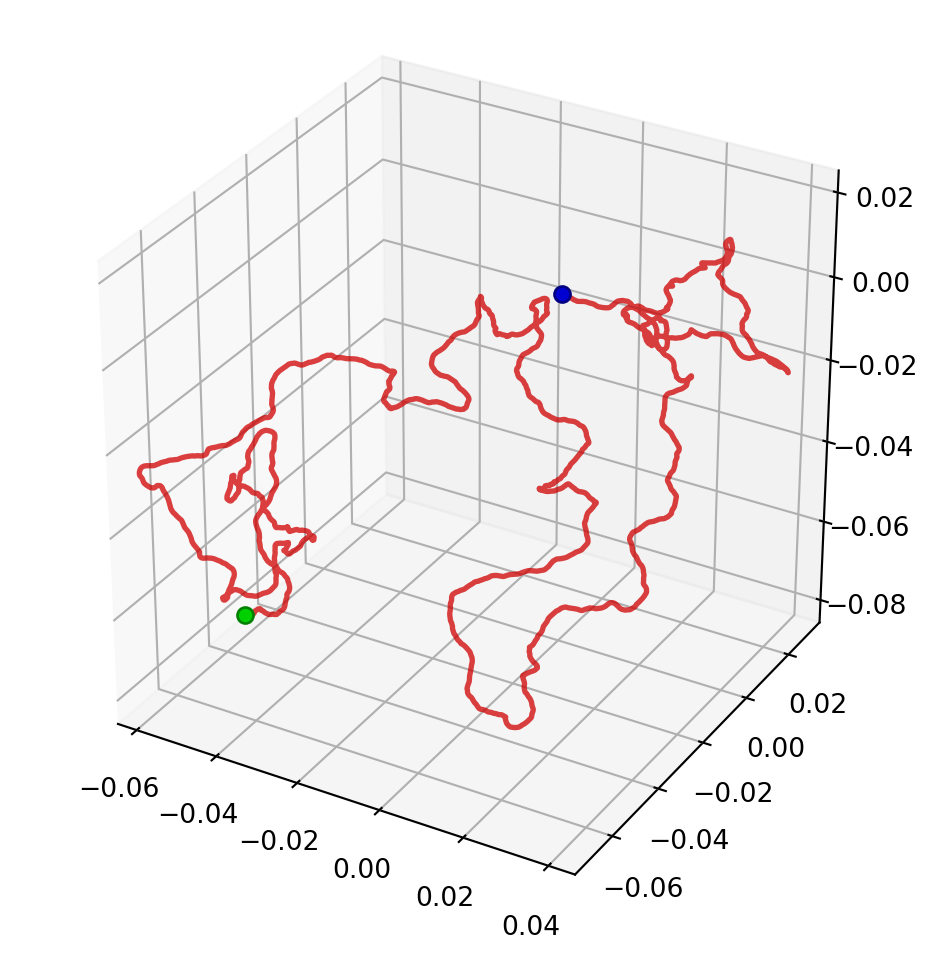

In [6]:
chain.plot()